# Jogo da Vida de Conway
O jogo da vida de Conway é um autômato celular, que foi concebido pelo matemático britânico John Horton Conway em 1970. O jogo é um exemplo de um sistema dinâmico que exibe padrões emergentes complexos. Apesar de suas regras simples, o jogo da vida é Turing completo e pode simular uma máquina universal de Turing.

O Jogo da Vida pode ser descrito como um grid bidimensional infinito de células, cada uma das quais pode estar viva ou morta. Cada célula interage com seus oito vizinhos, que são as células que estão horizontal, vertical ou diagonalmente adjacentes. Em cada passo do tempo, as seguintes regras são aplicadas a cada célula:
1. Uma célula morta com exatamente três vizinhos vivos se torna uma célula viva.
2. Uma célula viva com dois ou três vizinhos vivos permanece viva.
3. Em todos os outros casos, uma célula viva morre ou permanece morta.

 Vamos implementar o Jogo da vida usando um array bidimensional para representar o grid. Cada célula será representada por um 0 se estiver morta e 1 se estiver viva. Vamos implementar uma função que recebe um grid inicial e o número de passos de tempo e retorna o grid após o número especificado de passos de tempo.
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [41]:
# fig, ax = plt.subplots()
def game_of_life(grid, steps):
    # print(grid)
    plt.imshow(grid)
    plt.show()
    rows, cols = grid.shape
    new_grid = np.zeros((rows, cols))
    for _ in range(steps):
        for i in range(rows):
            for j in range(cols):
                neighbors = grid[max(i - 1, 0):min(i + 2, rows), max(j - 1, 0):min(j + 2, cols)]
                live_neighbors = np.sum(neighbors) - grid[i, j]
                if grid[i,j] == 1 and (live_neighbors<2 or live_neighbors>3):
                    new_grid[i,j] = 0
                if grid[i, j] == 0 and live_neighbors == 3:
                    new_grid[i, j] = 1
        grid = new_grid.copy()
        plt.cla()
        plt.imshow(grid)
        plt.show()
        # print(grid)
    return new_grid

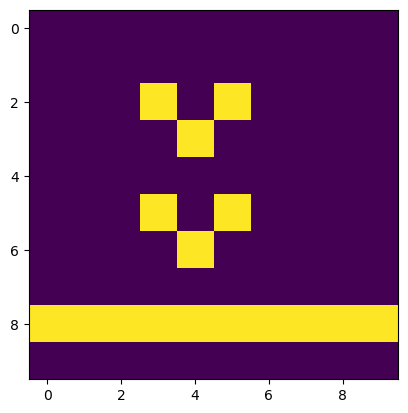

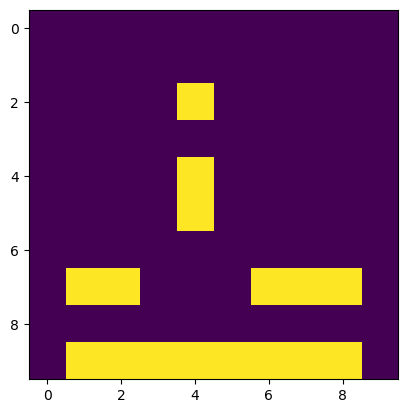

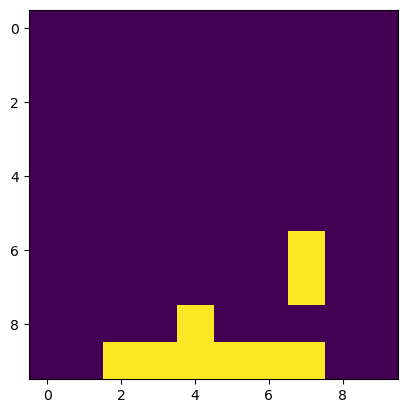

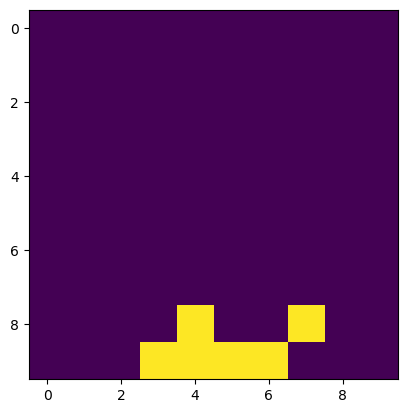

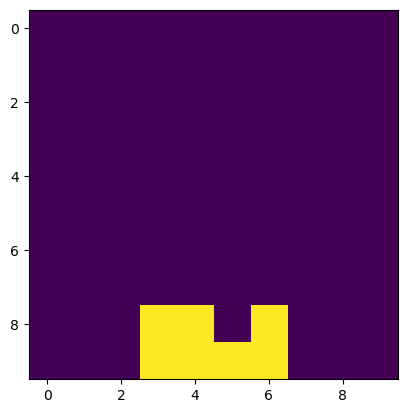

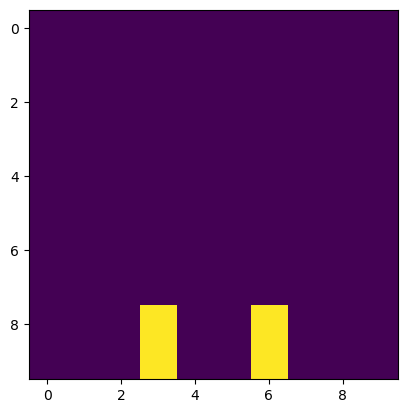

In [42]:
grid_inicial = np.zeros((10,10))
grid_inicial[2,3] = 1
grid_inicial[2,5] = 1
grid_inicial[3,4] = 1
grid_inicial[5,3] = 1
grid_inicial[5,5] = 1
grid_inicial[6,4] = 1
grid_inicial[8,:] = np.ones(10)


game_of_life(grid_inicial,5);

In [45]:
# implementação alternativa
def game_of_life2(grid, steps):
    for _ in range(steps):
        # Usa numpy.pad para adicionar uma borda de zeros ao redor do grid
        padded_grid = np.pad(grid, pad_width=1, mode='constant', constant_values=0)
        
        # Calcula o número de vizinhos vivos de cada célula
        neighbor_sum = sum(np.roll(np.roll(padded_grid, i, axis=0), j, axis=1)
                           for i in (-1, 0, 1) for j in (-1, 0, 1) if (i != 0 or j != 0))
        
        # Aplica as regras do jogo
        birth = (neighbor_sum==3) & (grid==0)
        survive = ((neighbor_sum==2) | (neighbor_sum==3)) & (grid==1)
        
        grid[:] = birth | survive
    return grid

In [46]:
game_of_life2(grid_inicial,10)

ValueError: operands could not be broadcast together with shapes (12,12) (10,10) 

# Visualização do Jogo da Vida
Vamos testar a função com um grid inicial aleatório de 10x10 e 10 passos de tempo.